# som with scikit-learn manner

In [1]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.
/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#/home/admin/github/wordroid.sblo.jp/lib
import os, sys
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from som import som

In [3]:
import random

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = datasets.load_iris()
print(dir(iris))
X = iris.data
print(iris.target_names)
X_sc = preprocessing.scale(X)

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['setosa' 'versicolor' 'virginica']


In [5]:
X_sc[:3]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673]])

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### get initial landmarks

In [7]:
sobj_makeK = som.SimpleSOM((20, 30), initialization_func='linear')
#sobj_makeK = som.SimpleSOM((20, 30))
sobj_makeK

In [8]:
sobj_makeK._initialize(X_sc)
sobj_makeK.K.shape

(600, 4)

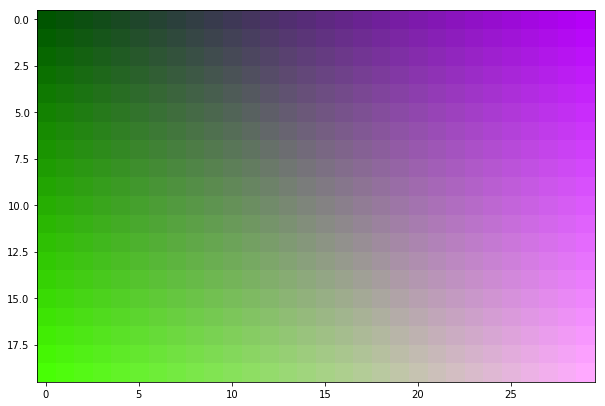

In [9]:
img = som.conv2img(sobj_makeK.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

### sksom

In [10]:
'''
argument init_K must be needed
'''
sobj = som.sksom((20, 30), init_K=sobj_makeK.K, it=150)
sobj

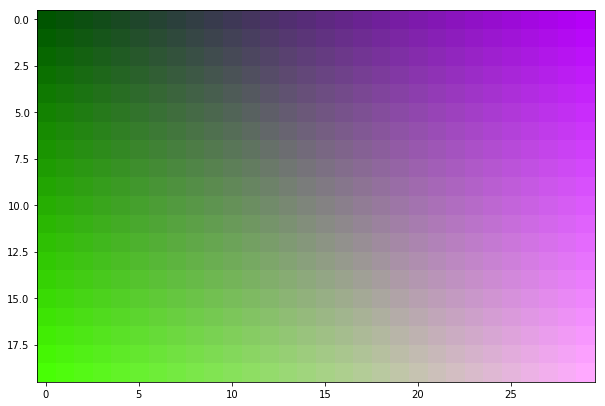

In [11]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [12]:
sobj.fit(X_sc)

100%|██████████| 150/150 [00:01<00:00, 146.85it/s]


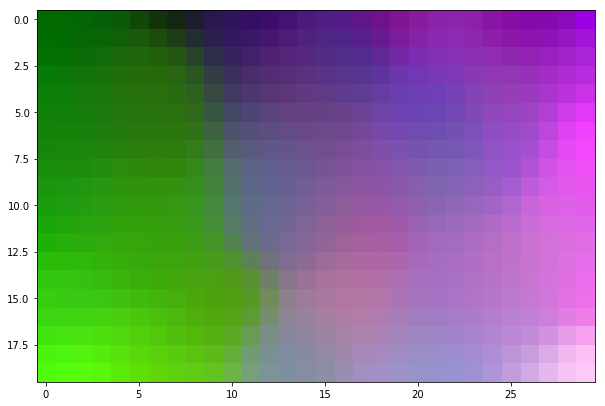

In [13]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

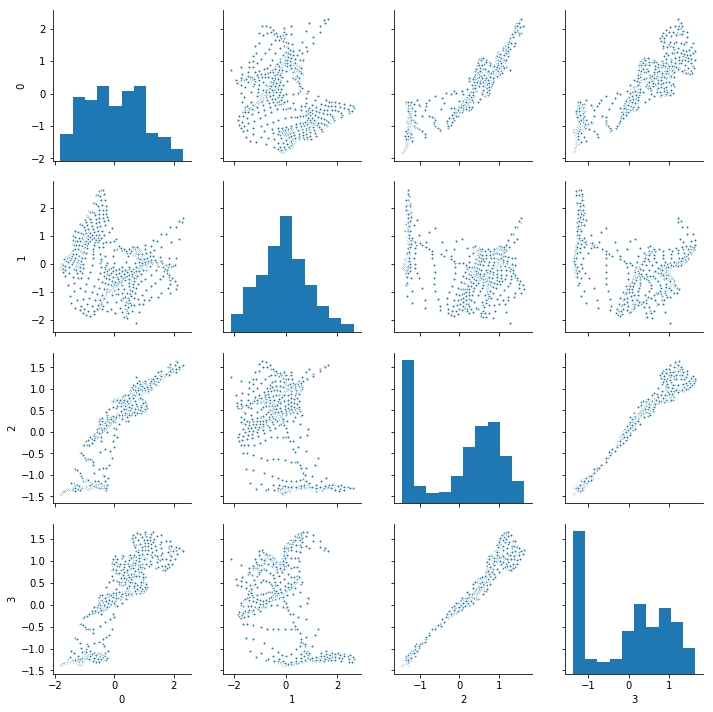

In [14]:
df = pd.DataFrame(sobj.landmarks_)
sns.pairplot(df, markers='.')

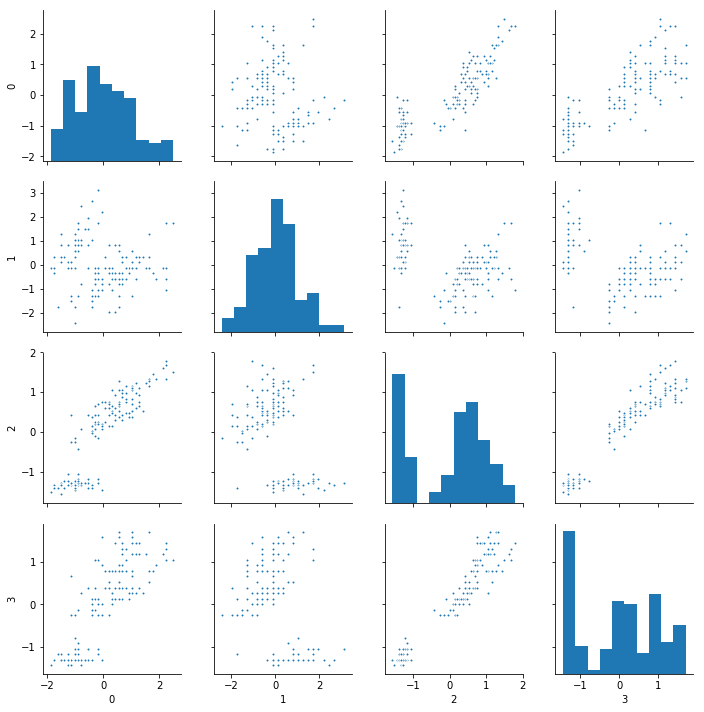

In [15]:
df = pd.DataFrame(X_sc)
sns.pairplot(df, markers='.')

In [16]:
sobj.labels_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [17]:
sobj.predict(sobj.landmarks_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
sobj.predict(X_sc)

array([395,  96, 211, 122, 393, 513, 300, 304,   3, 186, 517, 302,  95,
         0, 575, 572, 514, 395, 578, 450, 429, 422, 360, 278, 302, 127,
       307, 427, 398, 212, 154, 460, 540, 571, 186, 246, 489, 186,  31,
       335, 364,   7, 120, 338, 452,  96, 450, 180, 486, 275, 467, 494,
       467,  16, 348, 224, 555,  40, 377, 161,  12, 373,  18, 315, 221,
       436, 312, 164,  25, 103, 553, 226,  52, 256, 346, 406, 378, 439,
       314, 133,  73,  73, 165, 198, 282, 582, 466,  20, 311,  75, 106,
       374, 165,  10, 136, 341, 253, 345, 100, 223, 592, 170, 447, 294,
       442, 449,  76, 328, 118, 596, 529, 175, 384, 140, 202, 531, 381,
       599, 209,  27, 506, 201, 269, 144, 588, 387, 259, 291, 235, 357,
       298, 599, 235, 288,  81, 479, 591, 470, 291, 415, 503, 444, 170,
       505, 564, 443, 115, 353, 590, 261], dtype=int32)

In [19]:
'''
evaluate by gaussian kernel with gamma
'''
sobj.predict_proba(X_sc)[:10,:5]

array([[0.61154455, 0.60858987, 0.59822518, 0.58254269, 0.54890011],
       [0.90099087, 0.90826058, 0.9154046 , 0.92203311, 0.92555805],
       [0.91183425, 0.91077988, 0.90417637, 0.8923564 , 0.86311599],
       [0.95921921, 0.96117962, 0.95974028, 0.95376272, 0.93259473],
       [0.56121   , 0.55612413, 0.54276728, 0.52337385, 0.48415818],
       [0.25210754, 0.24986901, 0.24250905, 0.23153183, 0.20922167],
       [0.79659196, 0.79139997, 0.77738725, 0.75526072, 0.70797854],
       [0.71075752, 0.70911266, 0.70048343, 0.6863467 , 0.65355956],
       [0.98407968, 0.98908875, 0.99487701, 0.9987684 , 0.99639682],
       [0.88665771, 0.89055713, 0.89212215, 0.89151339, 0.88160327]])